<h1> IB labs -- T3 - Boundary Layer Measurements </h1>

In [60]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [61]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

**Plot velocity ratio profile $V/V_{\infty}$ as a function of distance from wall**

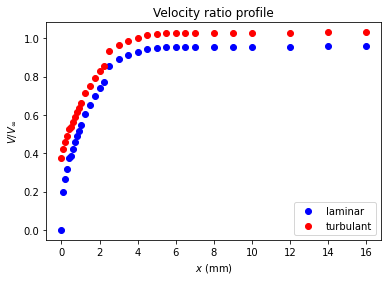

In [65]:
# Laminar flow
# distance (in mm): replace with your own values
laminar_data = np.loadtxt('laminar.csv')

xl = laminar_data[:,0]
# manometer reading (in mm): replace with your own values
dh_l = laminar_data[:,1] - laminar_data[0,1]
dhinf_l = np.mean(laminar_data[:,2])
#velocity ratio
vratiol = (dh_l/dhinf_l)**0.5

# Turbulent flow
# distance (in mm): replace with your own values
turbulent_data = np.loadtxt('turbulent.csv')

xt = turbulent_data[:,0]
# manometer reading (in mm): replace with your own values
dh_t = turbulent_data[:,1]
dhinf_t = np.mean(turbulent_data[:,2])
vratiot = (dh_t/dhinf_t)**0.5

# Plot
plt.scatter(xl, vratiol, c = 'blue', label = 'laminar')
plt.scatter(xt, vratiot, c = 'red', label = 'turbulant')
plt.title('Velocity ratio profile')
plt.xlabel('$x$ (mm)')
plt.ylabel('$V/V_{\infty}$')

plt.legend()

plt.savefig('velocity_profiles.png', dpi = 300)
plt.show()

**Drag of spheres**

Enter the data for the measurements of the mass of spheres


In [76]:
# data for mass of spheres (m (g), D (mm), t(s))
m = np.array([2.426, 8.439, 1.453, 2.325]) * 1e-3
D = np.array([15.63, 12.65, 12.6, 15.41]) * 1e-3
t = np.array([5, 0.8, 8.2, 5.1])
#          water   glycerol oil     water
liquid = ['water', 'glycerol','oil','water']
colors = ['blue', 'grey', 'brown', 'blue']
# fluid viscosity (kg/m/s)
mu  = np.array([1.0E-3, 1513.0E-3, 48.7E-3, 1.0E-3])
# fluid density (kg/m3)
rho0  = np.array([1000., 1261., 870., 1000.])
# height of drop (mm)
L = 1025 * 1e-3
# calculate velocity
Vs = L/t
# Volume
V = np.pi*D**3/6#
# Area
A = np.pi*D**2/4

g = 9.81
rho_ball = m/V

Cd = (m * g - rho0 * V * g)/(0.5 * rho_ball * Vs**2 * A)
ReD = rho0 * Vs * D / mu
# Cd = ...
# complete your sheet here
print('Cd = ', Cd)
print('ReD = ', ReD)

Cd =  [0.85566179 0.08482965 3.93282912 0.87771125]
ReD =  [3204.15         13.50829581   28.13655031 3097.10784314]


C:\Users\louis\AppData\Local\Temp\ipykernel_1860\2893926751.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.loglog(ReD[i], Cd[i], 'ro-', c = colors[i], label = liquid[i])


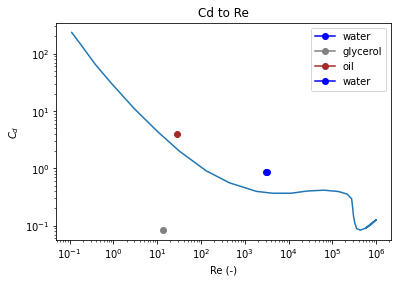

In [77]:
# Previous experimental curve fit:
ReD_model = [0.111205779,0.190986898,0.379328545,0.872859896,2.986757994,10.78471291,32.64400842,131.3147426,448.0331753,1851.754986,4346.391687,11468.43086,26696.02154,64091.71667,136855.5307,217356.4122,276307.7592,290002.7746,304148.4946,326173.737,361306.8802,441123.6656,580961.1903,773934.143,999350.5444,580961.1903,773934.143,999350.5444]
Cd_model = [234.2135866,134.911165,65.871184,31.07550634,10.99037585,4.192991504,1.972105036,0.904672821,0.558220724,0.396105462,0.367516765,0.367584114,0.401747281,0.415627382,0.394551304,0.355817824,0.294785733,0.214700657,0.148070044,0.111406027,0.088489415,0.083605731,0.09095536,0.105633483,0.12680684,0.09095536,0.105633483,0.12680684]
# Plot
plt.title('Cd to Re')
plt.xlabel('Re (-)')
plt.ylabel('$C_d$')
#plt.show()

# overlay your data here by adding elements to the plot.
for i in range(Cd.size):
    plt.loglog(ReD[i], Cd[i], 'ro-', c = colors[i], label = liquid[i])

plt.loglog(ReD_model, Cd_model)

plt.legend()

plt.savefig('CdRe_graph.png', dpi = 300)
plt.show()